# Task 1: Image compression with K-means

### Team Member :
#### Hatim Jamali

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

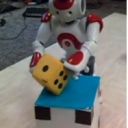

In [2]:
from IPython.display import Image
Image(filename='NAORelease.jpg')


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import imageio
from scipy import misc 

In [4]:
def read_image(): 
    image = imageio.imread('NAORelease.jpg')  
    image = image / 255 
    return image 

In [5]:
def initializetion_means(image, clusters): 
    points = np.reshape(image, (image.shape[0] * image.shape[1], 
                                                image.shape[2]))  
    m, n = points.shape 
    means = np.zeros((clusters, n))  
    for i in range(clusters): 
        rand1 = int(np.random.random(1)*m) 
        rand2 = int(np.random.random(1)*m) 
        rand3 = int(np.random.random(1)*m)
        means[i, 0] = points[rand1, 0] 
        means[i, 1] = points[rand2, 1] 
        means[i, 2] = points[rand3, 2]
    return points, means 

In [6]:
def distance(x1, y1,z1, x2, y2,z2): 
      
    dist = np.square(x1 - x2) + np.square(y1 - y2) + np.square(z1 - z2)
    dist = np.sqrt(dist) 
  
    return dist 
  

In [7]:
def k_means(points, means, clusters): 
  
    iterations = 10   
    m, n = points.shape 
 
    index = np.zeros(m)  

    while(iterations > 0): 
  
        for j in range(len(points)): 
 
            minv = 1000
            temp = None
              
            for k in range(clusters): 
                  
                x1 = points[j, 0] 
                y1 = points[j, 1] 
                z1 = points[j, 2]
                x2 = means[k, 0] 
                y2 = means[k, 1] 
                z2 = means[k, 2]
                  
                if(distance(x1, y1,z1, x2, y2, z2) < minv):          
                    minv = distance(x1, y1,z1, x2, y2, z2) 
                    temp = k 
                    index[j] = k  
          
        for k in range(clusters): 
              
            sumx = 0
            sumy = 0
            sumz = 0
            count = 0
              
            for j in range(len(points)): 
                  
                if(index[j] == k): 
                    sumx += points[j, 0] 
                    sumy += points[j, 1]  
                    sumz += points[j, 2]
                    count += 1
              
            if(count == 0): 
                count = 1    
              
            means[k, 0] = float(sumx / count) 
            means[k, 1] = float(sumy / count) 
            means[k, 2] = float(sumz / count) 
              
        iterations -= 1
  
    return means, index 
  
  

In [8]:
def plot_image(means, index, img): 
  

    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
      
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1], 
                                                     img.shape[2])) 
  
    plt.imshow(recovered) 
    plt.show() 

  

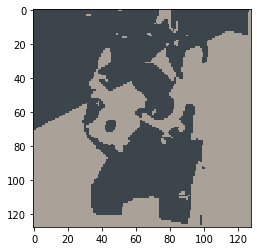

In [12]:
image = read_image() 
clusters = 2
points, means = initializetion_means(image, clusters) 
means, index = k_means(points, means, clusters) 

plot_image(means, index, image) 

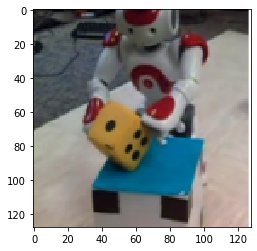

In [9]:
plt.imshow(image) 

### With sklearn

C:\Users\Pc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Pc\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


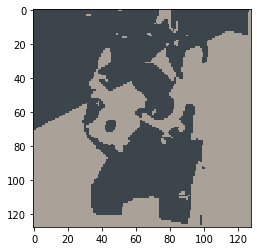

In [13]:
from sklearn.cluster import KMeans
import pandas as pd
img = read_image()
points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2])) 
k_means = KMeans(n_clusters=2).fit(points)
# compute k-means clustering
labels = k_means.labels_
p = pd.DataFrame(points) 
p['labels']= labels

c = np.zeros((15,3))
 
for i in range(15):
    c[i] = np.mean(np.array(p[p['labels']==i]),axis=0)[:3]
labels = k_means.labels_
p = pd.DataFrame(points) 
p['labels']= labels

c = np.zeros((15,3))
 
for i in range(15):
    c[i] = np.mean(np.array(p[p['labels']==i]),axis=0)[:3]
labels = k_means.labels_
p = pd.DataFrame(points) 
p['labels']= labels

c = np.zeros((15,3))
 
for i in range(15):
    c[i] = np.mean(np.array(p[p['labels']==i]),axis=0)[:3]
    
data =  np.array(points[:,:])
labels = labels[np.newaxis].T
res = np.hstack((data,labels))    

for i in range(16384):
    data[i][0:3] = c[int(res[i][3])]
data = np.reshape(data, (img.shape[0], img.shape[1],img.shape[2]))    
plt.imshow(data) 
plt.show() 

### With openCV

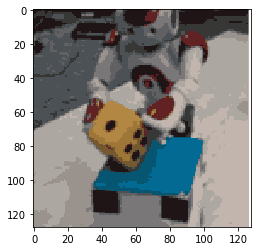

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('NAORelease.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

#define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 15
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# convert into uint8
center = np.uint8(center)

res = center[label.flatten()]
res2 = res.reshape((img.shape))
res2=cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
plt.imshow(res2) 
plt.show() 


# Task 2: Mixture of Gaussian, EM-Algorithm
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets:

In [21]:
import numpy as np
%matplotlib inline

## Dataset 1

In [22]:
# Make some random data in 2D.
np.random.seed(150)
means1 = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances1 = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes1 = [5, 1, 2]
factor1 = 100
data1 = np.zeros((1, 2))
for i in range(len(means1)):
    data1 = np.concatenate([data1,
         np.random.multivariate_normal(means1[i], covariances1[i],
                                           size=factor1 * amplitudes1[i])])
data1 = data1[1:, :]
    #data
    

## Dataset2

In [14]:
# Make some random data in 2D.
np.random.seed(150)
means2 = np.array([[1.1, 6.5],
                      [2.5, 4.7],
                      #[3.0, 2.6],
                      [3.0, 3.3]])
covariances2 = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
                   np.array([[0.35, 0.22], [0.22, 0.20]]),
                   #np.array([[0.06, 0.05], [0.05, 1.30]]),
                   np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes2 = [4, 1, 3]
factor2 = 100

data2 = np.zeros((1, 2))
for i in range(len(means2)):
    data2 = np.concatenate([data2,
    np.random.multivariate_normal(means2[i], covariances2[i],
                                                size=factor2 * amplitudes2[i])])
data2 = data2[1:, :]

Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

<img src="files/04_Exercise1_MoG_EM.png">

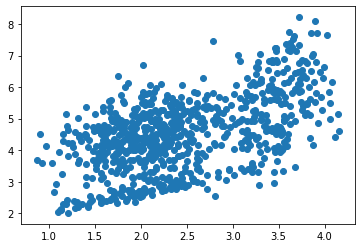

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture   
# select first two columns  
X = data1[1:, :] 
  
# turn it into a dataframe 
d = pd.DataFrame(X) 
  
# plot the data 
plt.scatter(d[0], d[1]) 

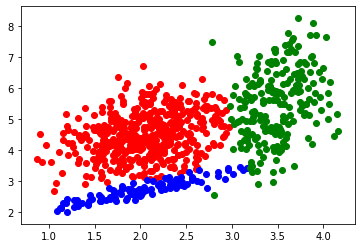

In [26]:
gmm2 = GaussianMixture(n_components = 3) 
 
gmm2.fit(d) 
  
labels = gmm2.predict(d) 
d['labels']= labels
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1] 
d2 = d[d['labels']== 2] 
  
plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='b') 
plt.scatter(d2[0], d2[1], c ='g') 

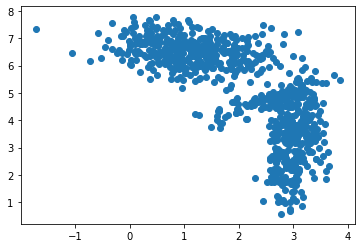

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture   
 
X2 = data2[1:, :] 
  

d2 = pd.DataFrame(X2) 

plt.scatter(d2[0], d2[1]) 

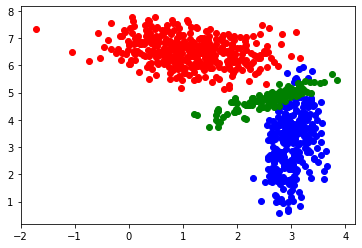

In [31]:
gmm2 = GaussianMixture(n_components = 3) 

gmm2.fit(d2) 
   
labels2 = gmm2.predict(d2) 
d2['labels']= labels2
d0 = d2[d2['labels']== 0] 
d1 = d2[d2['labels']== 1] 
d2 = d2[d2['labels']== 2] 
  
plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='b') 
plt.scatter(d2[0], d2[1], c ='g') 